In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

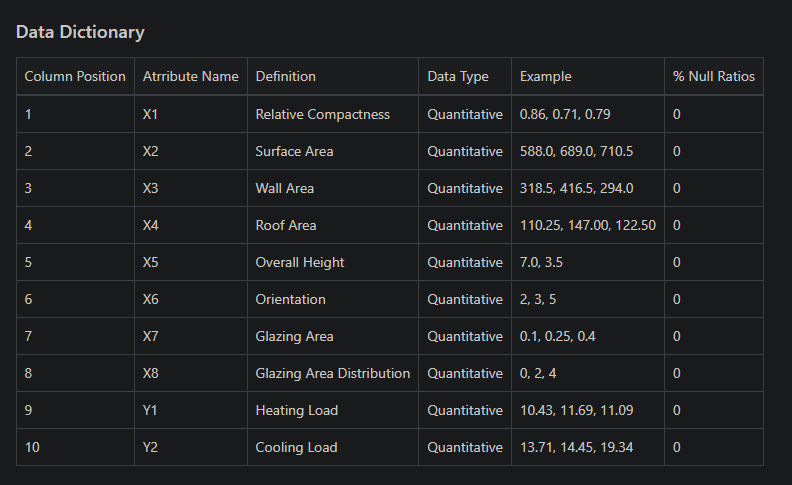

In [2]:
df = pd.read_excel(r"DATA\Energy Efficiency\ENB2012_data.xlsx")

print(df.shape)

df.head()

(768, 10)


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


# EDA

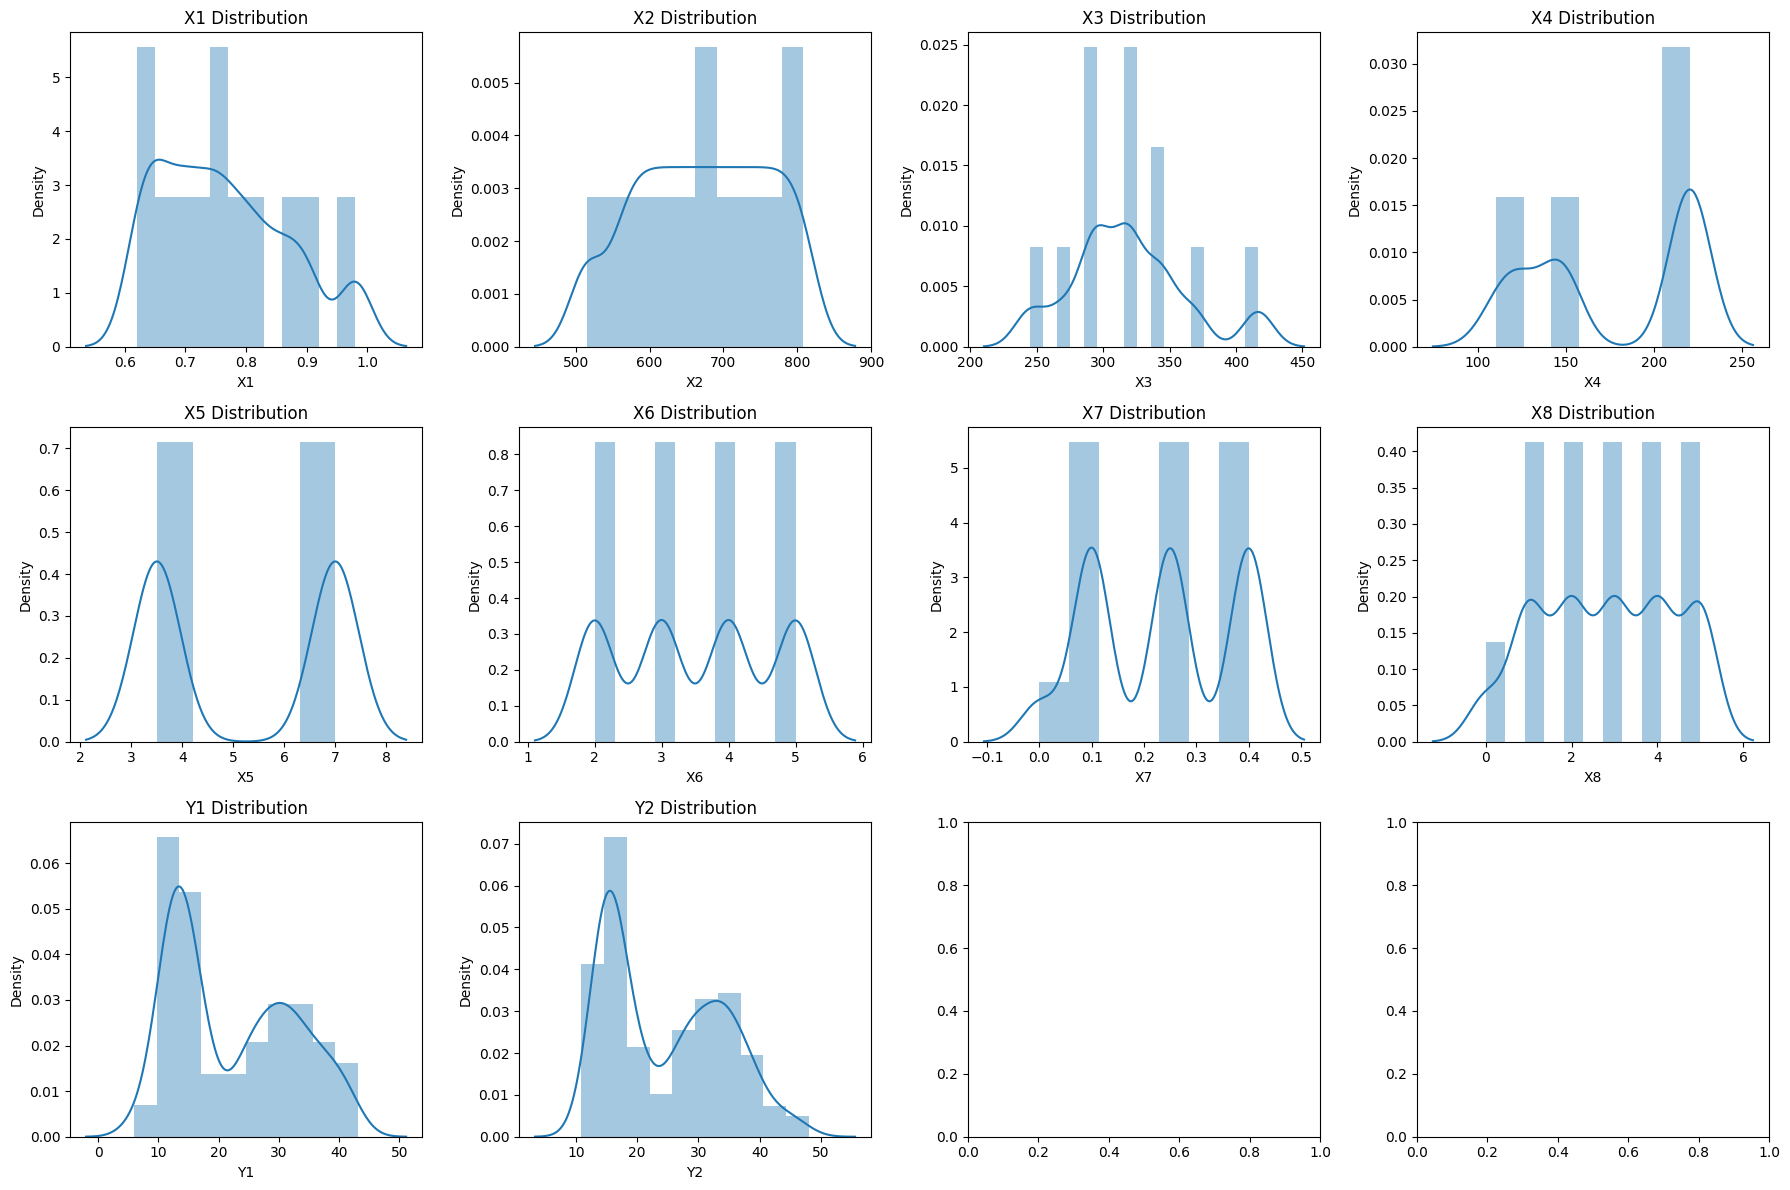

In [4]:
import warnings
warnings.filterwarnings("ignore")

def plot_distributions(df, n_cols=3):
    n_rows = (len(df.columns)) // n_cols + 1
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows))
    axes = axes.flatten()
    
    for i, var_name in enumerate(df.columns.tolist()):
        ax = axes[i]
        sns.distplot(df[var_name], kde=True, ax=ax)
        ax.set_title(f'{var_name} Distribution')
    
    plt.tight_layout()
    plt.show()

# Kullanım
plot_distributions(df, n_cols=4)

# Train | Test Split

In [5]:
from sklearn.model_selection import train_test_split

X = df[df.columns[:-2]]
y = df[df.columns[-2:]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test,y_test], axis = 1)

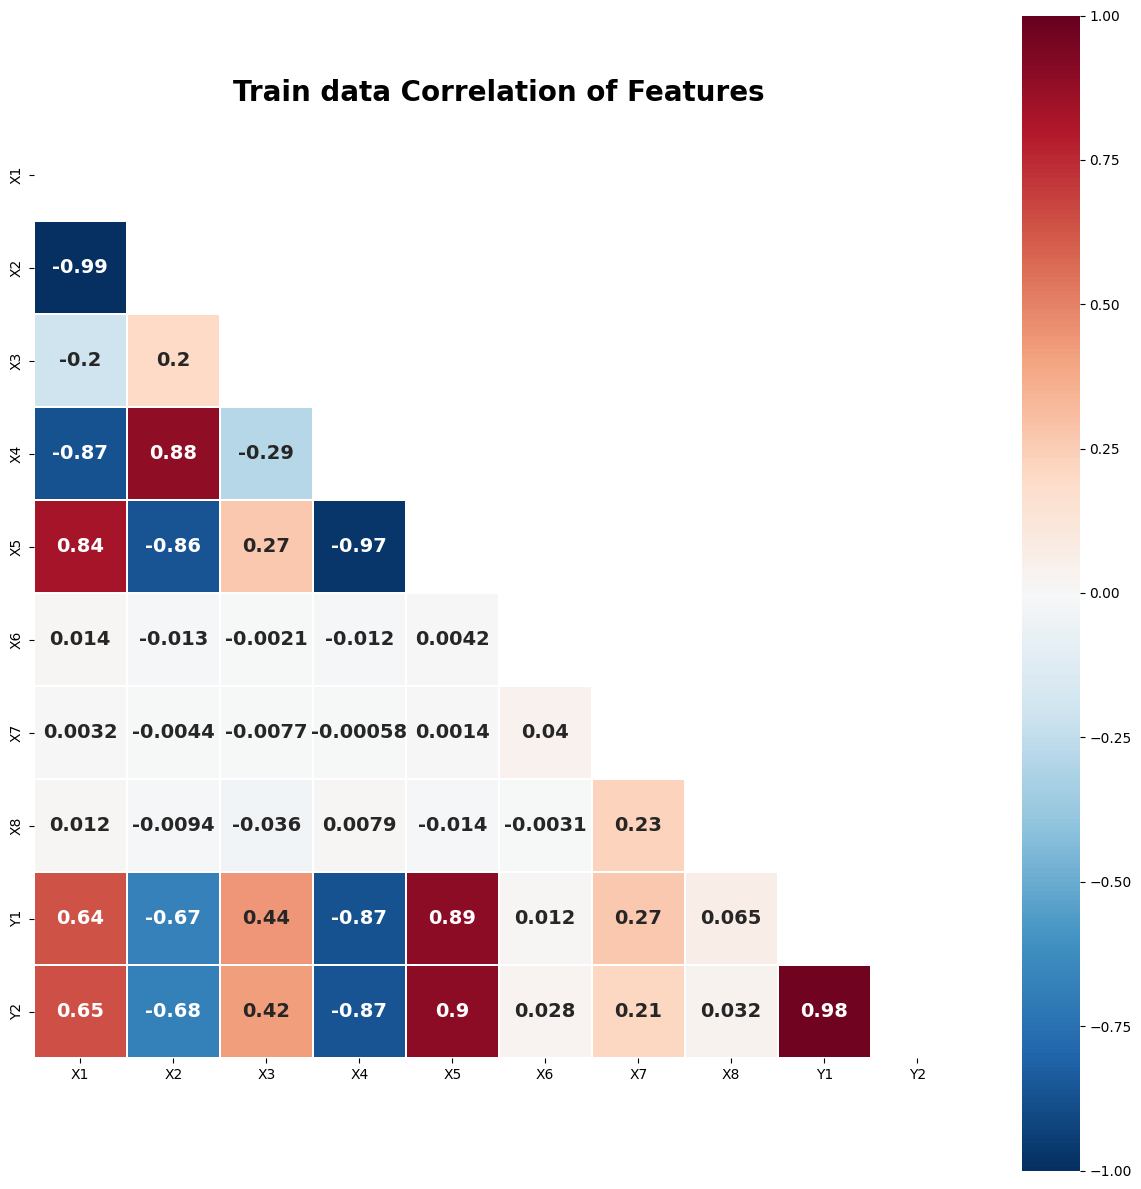

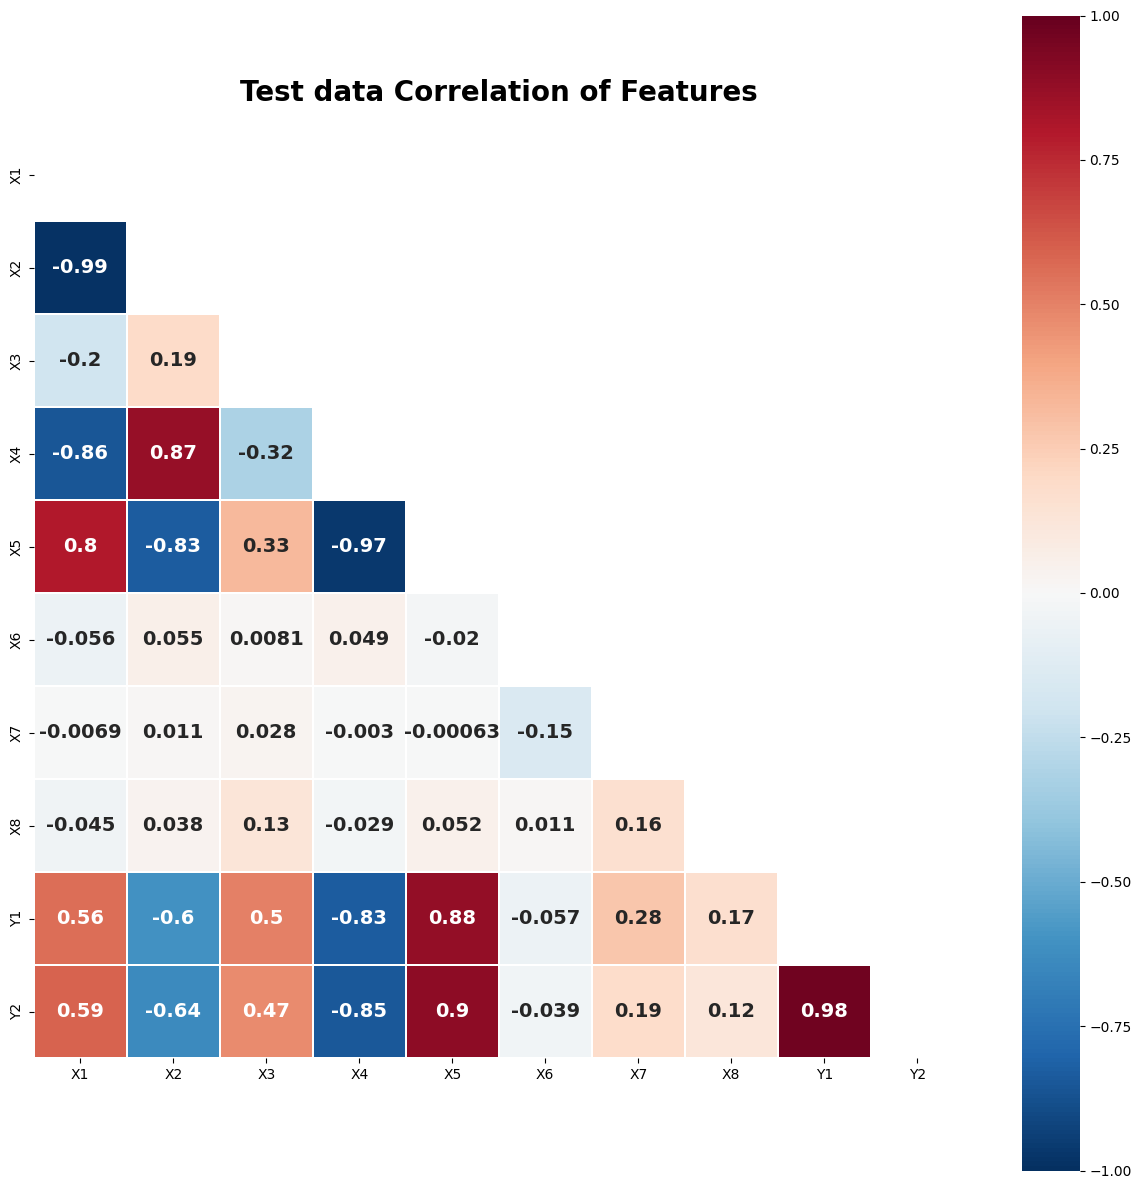

In [6]:
def plot_heatmap(df, title):
    # Create a mask for the diagonal elements
    mask = np.zeros_like(df.astype(float).corr())
    mask[np.triu_indices_from(mask)] = True

    # Set the colormap and figure size
    colormap = plt.cm.RdBu_r
    plt.figure(figsize=(15, 15))

    # Set the title and font properties
    plt.title(f'{title} Correlation of Features', fontweight='bold', y=1.02, size=20)

    # Plot the heatmap with the masked diagonal elements
    sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1.0, 
                square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 14, "weight": "bold"},
                mask=mask)

plot_heatmap(df_train, title='Train data')
plot_heatmap(df_test, title='Test data')
# plot_heatmap(original[num_cols+[target_col]], title='original')

# Functions(Utils)

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def eval_metric_multiclass(name, model, X_test, y_test):
    """Fit edilmiş modeli alıp skorları döndürür."""
    y1_true, y1_pred = y_test['Y1'], model.predict(X_test)[:, 0]
    y2_true, y2_pred = y_test['Y2'], model.predict(X_test)[:, 1]
    
    r2_y1 = r2_score(y1_true, y1_pred)
    r2_y2 = r2_score(y2_true, y2_pred)

    mae_y1 = mean_absolute_error(y1_true, y1_pred)
    mae_y2 = mean_absolute_error(y2_true, y2_pred)
    
    rmse_y1 = mean_squared_error(y1_true, y1_pred) ** 0.5
    rmse_y2 = mean_squared_error(y2_true, y2_pred) ** 0.5
    
    mse_y1 = mean_squared_error(y1_true, y1_pred)
    mse_y2 = mean_squared_error(y2_true, y2_pred)
    
    combined_r2 = (r2_y1 + r2_y2) / 2
    combined_mae = (mae_y1 + mae_y2) / 2
    combined_rmse = (rmse_y1 + rmse_y2) / 2
    combined_mse = (mse_y1 + mse_y2) / 2
    
    print(f'Test Scores for {name}: ')
    
    print("\n****************\n")
    print('Combined Scores')
    print(f'{name} Test R2 : {combined_r2}')
    print(f'{name} Test Mae : {combined_mae}')
    print(f'{name} Test RMSE : {combined_rmse}')
    print(f'{name} Test MSE : {combined_mse}')
    print("\n****************\n")
    print('Y1 Scores')
    print(f'{name} Test R2 Y1 : {r2_y1}')
    print(f'{name} Test Mae Y1 : {mae_y1}')
    print(f'{name} Test RMSE Y1 : {rmse_y1}')
    print(f'{name} Test MSE Y1 : {mse_y1}')
    print("\n****************\n")
    print('Y2 Scores')
    print(f'{name} Test R2 Y2 : {r2_y2}')
    print(f'{name} Test Mae Y2 : {mae_y2}')
    print(f'{name} Test RMSE Y2 : {rmse_y2}')
    print(f'{name} Test MSE Y2 : {mse_y2}')

# DecisionTree

In [8]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

eval_metric_multiclass('Decision Tree' , model , X_test, y_test)


Test Scores for Decision Tree: 

****************

Combined Scores
Decision Tree Test R2 : 0.963597826547419
Decision Tree Test Mae : 0.8479675324675325
Decision Tree Test RMSE : 1.582580032781465
Decision Tree Test MSE : 3.4513680389610393

****************

Y1 Scores
Decision Tree Test R2 Y1 : 0.9966354199831228
Decision Tree Test Mae Y1 : 0.40093506493506487
Decision Tree Test RMSE Y1 : 0.6095391914996325
Decision Tree Test MSE Y1 : 0.37153802597402574

****************

Y2 Scores
Decision Tree Test R2 Y2 : 0.9305602331117152
Decision Tree Test Mae Y2 : 1.2950000000000002
Decision Tree Test RMSE Y2 : 2.5556208740632975
Decision Tree Test MSE Y2 : 6.531198051948053


# RandomForest

In [9]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train , y_train)

eval_metric_multiclass("Random Forest" , model, X_test, y_test)

Test Scores for Random Forest: 

****************

Combined Scores
Random Forest Test R2 : 0.9775133601634203
Random Forest Test Mae : 0.7483814285714293
Random Forest Test RMSE : 1.2703214824004028
Random Forest Test MSE : 2.137159046449359

****************

Y1 Scores
Random Forest Test R2 Y1 : 0.9972921190636127
Random Forest Test Mae Y1 : 0.3649966233766224
Random Forest Test RMSE Y1 : 0.5468283049609731
Random Forest Test MSE Y1 : 0.299021195106491

****************

Y2 Scores
Random Forest Test R2 Y2 : 0.9577346012632278
Random Forest Test Mae Y2 : 1.1317662337662362
Random Forest Test RMSE Y2 : 1.9938146598398325
Random Forest Test MSE Y2 : 3.975296897792227


# XGBoost

In [10]:
from xgboost import XGBRegressor

model = XGBRegressor()

model.fit(X_train, y_train)

eval_metric_multiclass("XGBoost" , model, X_test, y_test)

Test Scores for XGBoost: 

****************

Combined Scores
XGBoost Test R2 : 0.9970757184761734
XGBoost Test Mae : 0.3369154085431781
XGBoost Test RMSE : 0.5199888851337673
XGBoost Test MSE : 0.28649747463326003

****************

Y1 Scores
XGBoost Test R2 Y1 : 0.9986008576569869
XGBoost Test Mae Y1 : 0.23360048962877944
XGBoost Test RMSE Y1 : 0.3930675158904372
XGBoost Test MSE Y1 : 0.1545020720482791

****************

Y2 Scores
XGBoost Test R2 Y2 : 0.99555057929536
XGBoost Test Mae Y2 : 0.44023032745757673
XGBoost Test RMSE Y2 : 0.6469102543770975
XGBoost Test MSE Y2 : 0.41849287721824097


# CatBoost

In [11]:
# Didin't work on Multi-Label Problems.

# LightGBM

In [12]:
# Didin't work on Multi-Label Problems.

# Optimized XGBoost

In [13]:
import optuna
from xgboost import XGBRegressor

X_train_small = X_train[:100]
X_val = X_train[:100]
y_train_small = y_train[:100]
y_val = y_train[:100]

def objective(trial):

    params = {
        'max_depth': trial.suggest_int('max_depth', 2, 16),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 1),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        'objective': 'reg:squarederror',
        'random_state': 42,
        'verbosity': 0
    }

    model = XGBRegressor(**params)
    model.fit(X_train_small, y_train_small)
    score = model.score(X_val, y_val)

    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2024-04-12 01:20:45,327] A new study created in memory with name: no-name-8f0e9cd3-ed87-447a-bbb7-1ecebcc3aa12
[I 2024-04-12 01:20:45,454] Trial 0 finished with value: 0.9935044870856682 and parameters: {'max_depth': 4, 'n_estimators': 290, 'min_child_weight': 8, 'gamma': 0.7056149399292866, 'subsample': 0.8133627213113405, 'colsample_bytree': 0.5341267024466473, 'reg_alpha': 0.8579737291324531, 'reg_lambda': 0.9449337930433638, 'learning_rate': 0.25139495727493666}. Best is trial 0 with value: 0.9935044870856682.
[I 2024-04-12 01:20:45,634] Trial 1 finished with value: 0.9969750026714488 and parameters: {'max_depth': 9, 'n_estimators': 310, 'min_child_weight': 1, 'gamma': 0.44278630575701616, 'subsample': 0.5415365426616114, 'colsample_bytree': 0.6343573860846938, 'reg_alpha': 0.9976454288641786, 'reg_lambda': 0.35661334668364386, 'learning_rate': 0.03141310853221188}. Best is trial 1 with value: 0.9969750026714488.
[I 2024-04-12 01:20:45,843] Trial 2 finished with value: 0.9989400

Best trial:
  Value: 0.9999982721464422
  Params: 
    max_depth: 9
    n_estimators: 413
    min_child_weight: 1
    gamma: 0.0009425748902649432
    subsample: 0.6400495625887788
    colsample_bytree: 0.6361850599332944
    reg_alpha: 0.0006812467685809453
    reg_lambda: 0.3531508970087528
    learning_rate: 0.4642988583639755


In [14]:
xgb_opt = XGBRegressor(**trial.params)

xgb_opt.fit(X_train, y_train)

eval_metric_multiclass("XGBoost Optimized" , xgb_opt, X_test, y_test)

Test Scores for XGBoost Optimized: 

****************

Combined Scores
XGBoost Optimized Test R2 : 0.9965724090835
XGBoost Optimized Test Mae : 0.3428563092590928
XGBoost Optimized Test RMSE : 0.5731331961793005
XGBoost Optimized Test MSE : 0.338849667899894

****************

Y1 Scores
XGBoost Optimized Test R2 Y1 : 0.9979884052098598
XGBoost Optimized Test Mae Y1 : 0.27783086169849763
XGBoost Optimized Test RMSE Y1 : 0.47130978365942067
XGBoost Optimized Test MSE Y1 : 0.2221329121730899

****************

Y2 Scores
XGBoost Optimized Test R2 Y2 : 0.9951564129571401
XGBoost Optimized Test Mae Y2 : 0.4078817568196879
XGBoost Optimized Test RMSE Y2 : 0.6749566086991802
XGBoost Optimized Test MSE Y2 : 0.4555664236266982


In [15]:
# XGBoost or XGBoost Optimized far better than others. We can build a main model with them.

In [ ]:
# Done.